<a href="https://colab.research.google.com/github/Seyed-Ali-Ahmadi/Python-for-Remote-Sensing/blob/master/Sentinel_1_OWI_product.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# install NetCDF4 package
!pip install netcdf4

In [0]:
# install Cartopy package
!apt-get -qq install python-cartopy python3-cartopy

In [0]:
import zipfile as zf
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [0]:
# Opening the Sentinel-1 OCN product...
file_name = '/content/S1A_IW_OCN__2SDV_20190718T212220_20190718T212245_028177_032EC9_AF8E.zip'

with zf.ZipFile(file_name, 'r') as zip:
  # Extract the file in the current directory.
  zip.extractall()
  # Print all containing files and folders.
  zip.printdir()

File Name                                             Modified             Size
S1A_IW_OCN__2SDV_20190718T212220_20190718T212245_028177_032EC9_AF8E.SAFE/ 2019-07-19 02:16:34            0
S1A_IW_OCN__2SDV_20190718T212220_20190718T212245_028177_032EC9_AF8E.SAFE/support/ 2019-07-19 02:16:34            0
S1A_IW_OCN__2SDV_20190718T212220_20190718T212245_028177_032EC9_AF8E.SAFE/support/s1-object-types.xsd 2019-07-19 02:16:34        60608
S1A_IW_OCN__2SDV_20190718T212220_20190718T212245_028177_032EC9_AF8E.SAFE/support/s1-map-overlay.xsd 2019-07-19 02:16:34          450
S1A_IW_OCN__2SDV_20190718T212220_20190718T212245_028177_032EC9_AF8E.SAFE/support/s1-product-preview.xsd 2019-07-19 02:16:34          440
S1A_IW_OCN__2SDV_20190718T212220_20190718T212245_028177_032EC9_AF8E.SAFE/support/s1-level-2-measurement.xsd 2019-07-19 02:16:34          471
S1A_IW_OCN__2SDV_20190718T212220_20190718T212245_028177_032EC9_AF8E.SAFE/S1A_IW_OCN__2SDV_20190718T212220_20190718T212245_028177_032EC9_AF8E.SAFE-report-

In [0]:
# Accessing the OWI sub-product.
nc_file = '/content/S1A_IW_OCN__2SDV_20190718T212220_20190718T212245_028177_032EC9_AF8E.SAFE/measurement/s1a-iw-ocn-vv-20190718t212127-20190718t212159-028177-032EC9-001.nc'
dataset = nc.Dataset(nc_file)

print(dataset.dimensions.keys())

odict_keys(['rvlRaSize', 'length', 'rvlAzSize', 'rvlSwath', 'owiRaSize', 'owiAzSize', 'owiIncSize', 'owiPolarisation', 'oswRaSize', 'oswAzSize', 'oswWavenumberBinSize', 'oswAngularBinSize', 'oswPartitions', 'oswKxBinSize', 'oswKyBinSize', 'oswLag'])


In [0]:
print(dataset.dimensions['owiAzSize'])
print(dataset.dimensions['owiRaSize'])
print(dataset.dimensions['owiIncSize'])
print(dataset.dimensions['owiPolarisation'])

<class 'netCDF4._netCDF4.Dimension'>: name = 'owiAzSize', size = 166

<class 'netCDF4._netCDF4.Dimension'>: name = 'owiRaSize', size = 255

<class 'netCDF4._netCDF4.Dimension'>: name = 'owiIncSize', size = 152

<class 'netCDF4._netCDF4.Dimension'>: name = 'owiPolarisation', size = 2



In [0]:
print(dataset.variables.keys())
print(dataset.variables['owiWindSpeed'])
print(dataset.variables['owiWindDirection'])

odict_keys(['oswPolSpec', 'oswPartitions', 'oswQualityCrossSpectraRe', 'oswQualityCrossSpectraIm', 'oswK', 'oswPhi', 'oswAzCutoff', 'oswRaCutoff', 'oswSpecRes', 'oswLon', 'oswLat', 'oswHs', 'oswWl', 'oswDirmet', 'oswSnr', 'oswAmbiFac', 'oswIconf', 'oswLookSeparationTime', 'oswNrcs', 'oswInten', 'oswNv', 'oswSkew', 'oswKurt', 'oswWindSpeed', 'oswWindDirection', 'oswEcmwfWindSpeed', 'oswEcmwfWindDirection', 'oswWindSeaHs', 'oswWaveAge', 'oswDepth', 'oswNlWidth', 'oswLandFlag', 'oswLandCoverage', 'oswIncidenceAngle', 'oswHeading', 'oswGroundRngSize', 'oswAziSize', 'oswEllipsLength', 'oswEllipsLengthStdDev', 'oswEllipsWidth', 'oswEllipsWidthStdDev', 'oswGroupDir', 'oswQualityFlagPartition', 'oswQualityFlag', 'oswTotalHs', 'oswCartSpecIm', 'oswCartSpecRe', 'oswKx', 'oswKy', 'oswJx', 'oswJy', 'owiHs', 'owiWl', 'owiDirmet', 'owiWindSeaHs', 'owiLon', 'owiLat', 'owiIncidenceAngle', 'owiElevationAngle', 'owiWindSpeed', 'owiWindDirection', 'owiEcmwfWindSpeed', 'owiEcmwfWindDirection', 'owiNrcs', 

nan nan


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


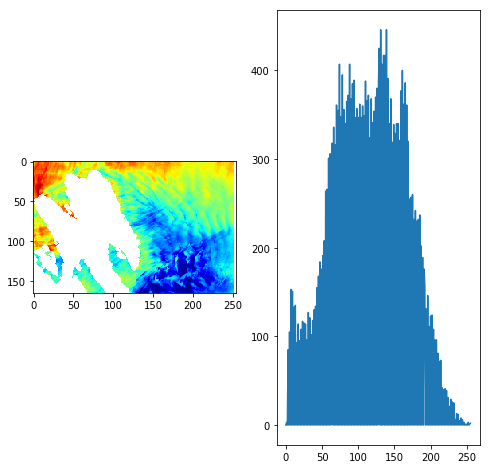

(<matplotlib.axes._subplots.AxesSubplot at 0x7f6ee95e2860>,
 None)

In [0]:
owiSpeed = np.array(dataset.variables['owiWindSpeed'])
owiSpeed[owiSpeed == -999.] = np.nan
print(np.amax(owiSpeed), np.amin(owiSpeed))

hist,bins = np.histogram(owiSpeed.ravel(),256,[0,13])

fig=plt.figure(figsize=(8, 8))
plt.subplot(121), plt.imshow(owiSpeed, cmap='jet')
plt.subplot(122), plt.plot(hist), plt.show()

In [0]:
lat = dataset.variables['owiLat']
lon = dataset.variables['owiLon']

/usr/local/lib/python3.6/dist-packages/matplotlib/ticker.py:1879: UserWarning: Steps argument should be a sequence of numbers
increasing from 1 to 10, inclusive. Behavior with
values outside this range is undefined, and will
raise a ValueError in future versions of mpl.
  warnings.warn('Steps argument should be a sequence of numbers\n'


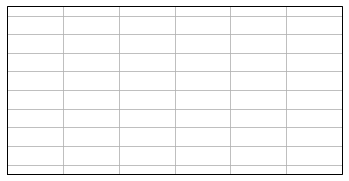

In [0]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.gridlines()
ax.set_global()